In [1]:
#importing the libraries
import numpy as np
import pandas as pd 
import string 
import spacy 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline 
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer

In [2]:
#reading the dataset
raw_data = pd.read_csv("E:/DataSet/covid19_tweets.csv")  
raw_data

user_name               user_location  \
0                       ᏉᎥ☻լꂅϮ                  astroworld   
1                Tom Basile 🇺🇸                New York, NY   
2              Time4fisticuffs            Pewee Valley, KY   
3                  ethel mertz        Stuck in the Middle    
4                     DIPR-J&K           Jammu and Kashmir   
...                        ...                         ...   
179103  AJIMATI AbdulRahman O.             Ilorin, Nigeria   
179104                   Jason                     Ontario   
179105             BEEHEMOTH ⏳                   🇨🇦 Canada   
179106           Gary DelPonte               New York City   
179107                 TUKY II  Aliwal North, South Africa   

                                         user_description  \
0       wednesday addams as a disney princess keepin i...   
1       Husband, Father, Columnist & Commentator. Auth...   
2       #Christian #Catholic #Conservative #Reagan #Re...   
3       #Browns #Indians #ClevelandProud #[]_[] #Cavs ...   
4       🖊️Official Twitter handle of Department of Inf...   
...                                                   ...   
179103    Animal Scientist|| Muslim|| Real Madrid/Chelsea   
179104  When your cat has more baking soda than Ninja ...   
179105  ⚒️ The Architects of Free Trade ⚒️ Really Did ...   
179106  Global UX UI Visual Designer. StoryTeller, Mus...   
179107  TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...   

               user_created  user_followers  user_friends  user_favourites  \
0       2017-05-26 05:46:42             624           950            18775   
1       2009-04-16 20:06:23            2253          1677               24   
2       2009-02-28 18:57:41            9275          9525             7254   
3       2019-03-07 01:45:06             197           987             1488   
4       2017-02-12 06:45:15          101009           168              101   
...                     ...             ...           ...              ...   
179103  2013-12-30 18:59:19             412          1609             1062   
179104  2011-12-21 04:41:30             150           182             7295   
179105  2016-07-13 17:21:59            1623          2160            98000   
179106  2009-10-27 17:43:13            1338          1111                0   
179107  2018-04-14 17:30:07              97          1697              566   

        user_verified                 date  \
0               False  2020-07-25 12:27:21   
1                True  2020-07-25 12:27:17   
2               False  2020-07-25 12:27:14   
3               False  2020-07-25 12:27:10   
4               False  2020-07-25 12:27:08   
...               ...                  ...   
179103          False  2020-08-29 19:44:21   
179104          False  2020-08-29 19:44:16   
179105          False  2020-08-29 19:44:15   
179106          False  2020-08-29 19:44:14   
179107          False  2020-08-29 19:44:08   

                                                     text  \
0       If I smelled the scent of hand sanitizers toda...   
1       Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2       @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3       @brookbanktv The one gift #COVID19 has give me...   
4       25 July : Media Bulletin on Novel #CoronaVirus...   
...                                                   ...   
179103  Thanks @IamOhmai for nominating me for the @WH...   
179104  2020! The year of insanity! Lol! #COVID19 http...   
179105  @CTVNews A powerful painting by Juan Lucena. I...   
179106  More than 1,200 students test positive for #CO...   
179107  I stop when I see a Stop\n\n@SABCNews\n@Izinda...   

                                 hashtags               source  is_retweet  
0                                     NaN   Twitter for iPhone       False  
1                                     NaN  Twitter for Android       False  
2                             ['COVID19']  Twitter for Android       False  
3           

In [3]:
data = raw_data.loc[:9999, raw_data.columns == "text"]
data

text
0     If I smelled the scent of hand sanitizers toda...
1     Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2     @diane3443 @wdunlap @realDonaldTrump Trump nev...
3     @brookbanktv The one gift #COVID19 has give me...
4     25 July : Media Bulletin on Novel #CoronaVirus...
...                                                 ...
9995  #ICYMI: New @wallabies coach Dave Rennie will ...
9996  So we are touching 1 L #COVID19 cases in just ...
9997  Which entity do I submit a word spelling chang...
9998  করোনায় চোখের যত্নে করনীয়\nFACEBOOK LINK:http...
9999  We're all patients now - isolation tantamount ...

[10000 rows x 1 columns]

In [4]:
tweets = [x.strip() for x in data["text"]] #removes line space
tweets = [x for x in tweets if x] #removes empty fields
tweets

['If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… https://t.co/QZvYbrOgb0',
 "Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… https://t.co/1QvW0zgyPu",
 '@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3',
 '@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… https://t.co/Z0pOAlFXcW',
 '25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… https://t.co/MN0EEcsJHh',
 "#coronavirus #covid19 deaths continue to rise. It's almost  as bad as it ever was.  Politicians and businesses want… https://t.co/hXMHooXX2C",
 'How #COVID19 Will Change Work in General (and recruiting, specifically) via/ @ProactiveTalent #Recruiting… https://t.co/bjZxzGPMbK

In [5]:
# Remove urls from the text
def remove_url(data):
    url_less_text_list = []
    for x in data:
        url_less_string = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', x)
        url_less_text_list.append(url_less_string)
    return url_less_text_list

In [6]:
tweets = remove_url(tweets)
tweets

['If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… ',
 "Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay their respects to the A… ",
 '@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… ',
 '@brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… ',
 '25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @airnewsalerts @ANI… ',
 "#coronavirus #covid19 deaths continue to rise. It's almost  as bad as it ever was.  Politicians and businesses want… ",
 'How #COVID19 Will Change Work in General (and recruiting, specifically) via/ @ProactiveTalent #Recruiting… ',
 'You now have to wear face coverings when out shopping - this includes a visit to your local Community Pharmacy… ',
 'Praying for good health and recovery of

In [7]:
# removing the usernames from the text
def remove_username(data):
    username_less_text_list = []
    for x in data:
        username_less_string = re.sub('@[^\s]+','', x)
        username_less_text_list.append(username_less_string)
    return username_less_text_list

In [8]:
tweets = remove_username(tweets)
tweets

['If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that… ',
 "Hey   and  - wouldn't it have made more sense to have the players pay their respects to the A… ",
 '   Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… ',
 ' The one gift #COVID19 has give me is an appreciation for the simple things that were always around me… ',
 '25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n    ',
 "#coronavirus #covid19 deaths continue to rise. It's almost  as bad as it ever was.  Politicians and businesses want… ",
 'How #COVID19 Will Change Work in General (and recruiting, specifically) via/  #Recruiting… ',
 'You now have to wear face coverings when out shopping - this includes a visit to your local Community Pharmacy… ',
 'Praying for good health and recovery of  .\n#covid19\n#covidPositive',
 'POPE AS GOD - Prophet Sadhu Sundar Selvaraj. Watch here at  \n\n#HurricaneHanna #COVID19… ',
 '49

In [9]:
text = ' '.join(tweets)
text

'If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that…  Hey   and  - wouldn\'t it have made more sense to have the players pay their respects to the A…     Trump never once claimed #COVID19 was a hoax. We all claim that this effort to…   The one gift #COVID19 has give me is an appreciation for the simple things that were always around me…  25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n     #coronavirus #covid19 deaths continue to rise. It\'s almost  as bad as it ever was.  Politicians and businesses want…  How #COVID19 Will Change Work in General (and recruiting, specifically) via/  #Recruiting…  You now have to wear face coverings when out shopping - this includes a visit to your local Community Pharmacy…  Praying for good health and recovery of  .\n#covid19\n#covidPositive POPE AS GOD - Prophet Sadhu Sundar Selvaraj. Watch here at  \n\n#HurricaneHanna #COVID19…  49K+ Covid19 cases still no response from

In [10]:
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text[0:500]

'If I smelled the scent of hand sanitizers today on someone in the past I would think they were so intoxicated that…  Hey   and   wouldnt it have made more sense to have the players pay their respects to the A…     Trump never once claimed COVID19 was a hoax We all claim that this effort to…   The one gift COVID19 has give me is an appreciation for the simple things that were always around me…  25 July  Media Bulletin on Novel CoronaVirusUpdates COVID19 \n     coronavirus covid19 deaths continue t'

In [11]:
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['If', 'I', 'smelled', 'the', 'scent', 'of', 'hand', 'sanitizers', 'today', 'on', 'someone', 'in', 'the', 'past', 'I', 'would', 'think', 'they', 'were', 'so', 'intoxicated', 'that…', 'Hey', 'and', 'wouldnt', 'it', 'have', 'made', 'more', 'sense', 'to', 'have', 'the', 'players', 'pay', 'their', 'respects', 'to', 'the', 'A…', 'Trump', 'never', 'once', 'claimed', 'COVID19', 'was', 'a', 'hoax', 'We', 'all']


In [12]:
text_tokens_lower = []
for word in text_tokens:
    text_tokens_lower.append(word.lower())
print(text_tokens_lower[0:50])

['if', 'i', 'smelled', 'the', 'scent', 'of', 'hand', 'sanitizers', 'today', 'on', 'someone', 'in', 'the', 'past', 'i', 'would', 'think', 'they', 'were', 'so', 'intoxicated', 'that…', 'hey', 'and', 'wouldnt', 'it', 'have', 'made', 'more', 'sense', 'to', 'have', 'the', 'players', 'pay', 'their', 'respects', 'to', 'the', 'a…', 'trump', 'never', 'once', 'claimed', 'covid19', 'was', 'a', 'hoax', 'we', 'all']


In [13]:
with open("E:/DataSet/stop.txt", "r") as file:
  all_words = file.read().replace("\n", " ")

stpwrds = all_words.split(" ")
print(stpwrds)

['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'conta

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

more_stopwords = stopwords.words('english')
more_stopwords.append("the")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ips29\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ips29\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
for word in more_stopwords:
    if word not in stpwrds:
        stpwrds.append(word)

In [16]:
no_stop_tokens = [word for word in text_tokens_lower if not word in stpwrds]
print(no_stop_tokens[0:40])

['smelled', 'scent', 'hand', 'sanitizers', 'today', 'past', 'intoxicated', 'that…', 'hey', 'wouldnt', 'made', 'sense', 'players', 'pay', 'respects', 'a…', 'trump', 'claimed', 'covid19', 'hoax', 'claim', 'effort', 'to…', 'gift', 'covid19', 'give', 'appreciation', 'simple', 'things', 'me…', '25', 'july', 'media', 'bulletin', 'coronavirusupdates', 'covid19', 'coronavirus', 'covid19', 'deaths', 'continue']


In [17]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

smelled scent hand sanitizers today past intoxicated that… hey wouldnt made sense players pay respects a… trump claimed covid19 hoax claim effort to… gift covid19 give appreciation simple things me… 25 july media bulletin coronavirusupdates


In [19]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['smell', 'scent', 'hand', 'sanitizer', 'today', 'past', 'intoxicate', 'that', '…', 'hey', 'would', 'nt', 'made', 'sense', 'player', 'pay', 'respect', 'a', '…', 'trump', 'claim', 'covid19', 'hoax', 'claim', 'effort']


In [21]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas) 
print(vectorizer.vocabulary_)

{'smell': 13600, 'scent': 13056, 'hand': 7208, 'sanitizer': 12951, 'today': 14782, 'past': 11113, 'intoxicate': 8222, 'that': 14594, 'hey': 7440, 'would': 16073, 'nt': 10590, 'made': 9326, 'sense': 13226, 'player': 11423, 'pay': 11149, 'respect': 12531, 'trump': 15011, 'claim': 3735, 'covid19': 4387, 'hoax': 7518, 'effort': 5608, 'to': 14777, 'gift': 6855, 'give': 6873, 'appreciation': 2070, 'simple': 13481, 'thing': 14666, '25': 610, 'july': 8512, 'medium': 9646, 'bulletin': 3160, 'coronavirusupdate': 4291, 'coronavirus': 4269, 'death': 4797, 'continue': 4163, 'rise': 12677, 'bad': 2420, 'politician': 11499, 'business': 3193, 'want': 15723, 'change': 3536, 'work': 16026, 'general': 6796, 'recruit': 12282, 'specifically': 13797, 'wear': 15784, 'face': 6115, 'covering': 4380, 'shopping': 13397, 'include': 7936, 'visit': 15635, 'local': 9160, 'community': 3954, 'pharmacy': 11298, 'pray': 11634, 'good': 6961, 'health': 7331, 'recovery': 12278, 'covidpositive': 4467, 'pope': 11525, 'god': 

In [22]:
print(vectorizer.get_feature_names())

['000', '000bed', '001', '01', '010', '01012020', '012', '01206', '01472', '015849068', '02', '020000', '0203', '023001', '02617161111', '03', '030001', '03001377779', '033101', '0355', '04', '040001', '04232085', '043001', '05', '050000', '053001', '05530', '06', '060', '0600', '060001', '0604', '0605020000gmt', '063001', '07', '070', '0700', '070001', '0705010000gmt', '071', '0719310965', '071bottle', '0725', '072520', '073000', '07827', '079', '08', '080', '0800', '080000', '0805020000gmt', '0807', '08129337456', '0828229091', '09', '0900', '0905010000gmt', '0908', '09278222333', '098581', '10', '100', '1000', '10000', '100000', '1000gmt', '1000mark', '1000s', '1005', '1005010000gmt', '100daysofcode', '100k', '100plus', '100pm', '100s', '100yearold', '100yo', '101', '1015', '1019', '1019yr', '1020', '1020am', '1021', '1022mhz', '1023', '1024', '1026', '103', '1030', '1030am', '1030pm', '10313', '1032', '1037', '103yearold', '104', '10400129', '105', '1054', '1055', '105750', '105yea

In [23]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(tweets)

In [24]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['19', '2020', 'about', 'after', 'all', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', 'cases', 'coronavirus', 'covid', 'covid 19', 'covid19', 'covid19 and', 'covid19 cases', 'daily', 'day', 'deaths', 'do', 'don', 'during', 'even', 'for', 'for covid19', 'from', 'get', 'has', 'have', 'he', 'health', 'help', 'how', 'if', 'in', 'in the', 'india', 'is', 'it', 'july', 'just', 'like', 'lockdown', 'mask', 'more', 'my', 'need', 'new', 'no', 'not', 'now', 'of', 'of covid19', 'of the', 'on', 'on the', 'one', 'or', 'our', 'out', 'over', 'pandemic', 'people', 'positive', 'positive for', 're', 'risk', 'so', 'spread', 'tests', 'that', 'the', 'the covid19', 'their', 'there', 'they', 'this', 'to', 'to the', 'today', 'total', 'up', 'us', 'was', 'we', 'what', 'when', 'who', 'why', 'will', 'with', 'you', 'your']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(tweets)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['000', '07', '10', '100', '11', '12', '15', '19', '19 cases', '20', '2020', '24', '24 hours', '25', '30', 'about', 'about the', 'across', 'across the', 'active', 'active cases', 'africa', 'after', 'against', 'all', 'all the', 'alreadyvideo', 'also', 'am', 'america', 'amid', 'amp', 'an', 'and', 'and identify', 'and identify at', 'and the', 'another', 'any', 'are', 'are the', 'are you', 'around', 'as', 'as the', 'at', 'at risk', 'at risk cases', 'at the', 'back', 'be', 'because', 'been', 'before', 'being', 'best', 'better', 'blood', 'breaking', 'business', 'but', 'by', 'by self', 'by self reporting', 'by the', 'call', 'called', 'can', 'care', 'case', 'cases', 'cases and', 'cases in', 'cases of', 'cases sooner', 'cases sooner by', 'check', 'chief', 'chief minister', 'children', 'china', 'chouhan', 'cm', 'come', 'community', 'confirmed', 'confirmed cases', 'contact', 'continue', 'continue to', 'corona', 'coronavirus', 'coronavirus covid19', 'coronaviruspandemic', 'coronavirusupdate', 'cou

In [26]:
lemma_para = ' '.join(lemmas)

In [27]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

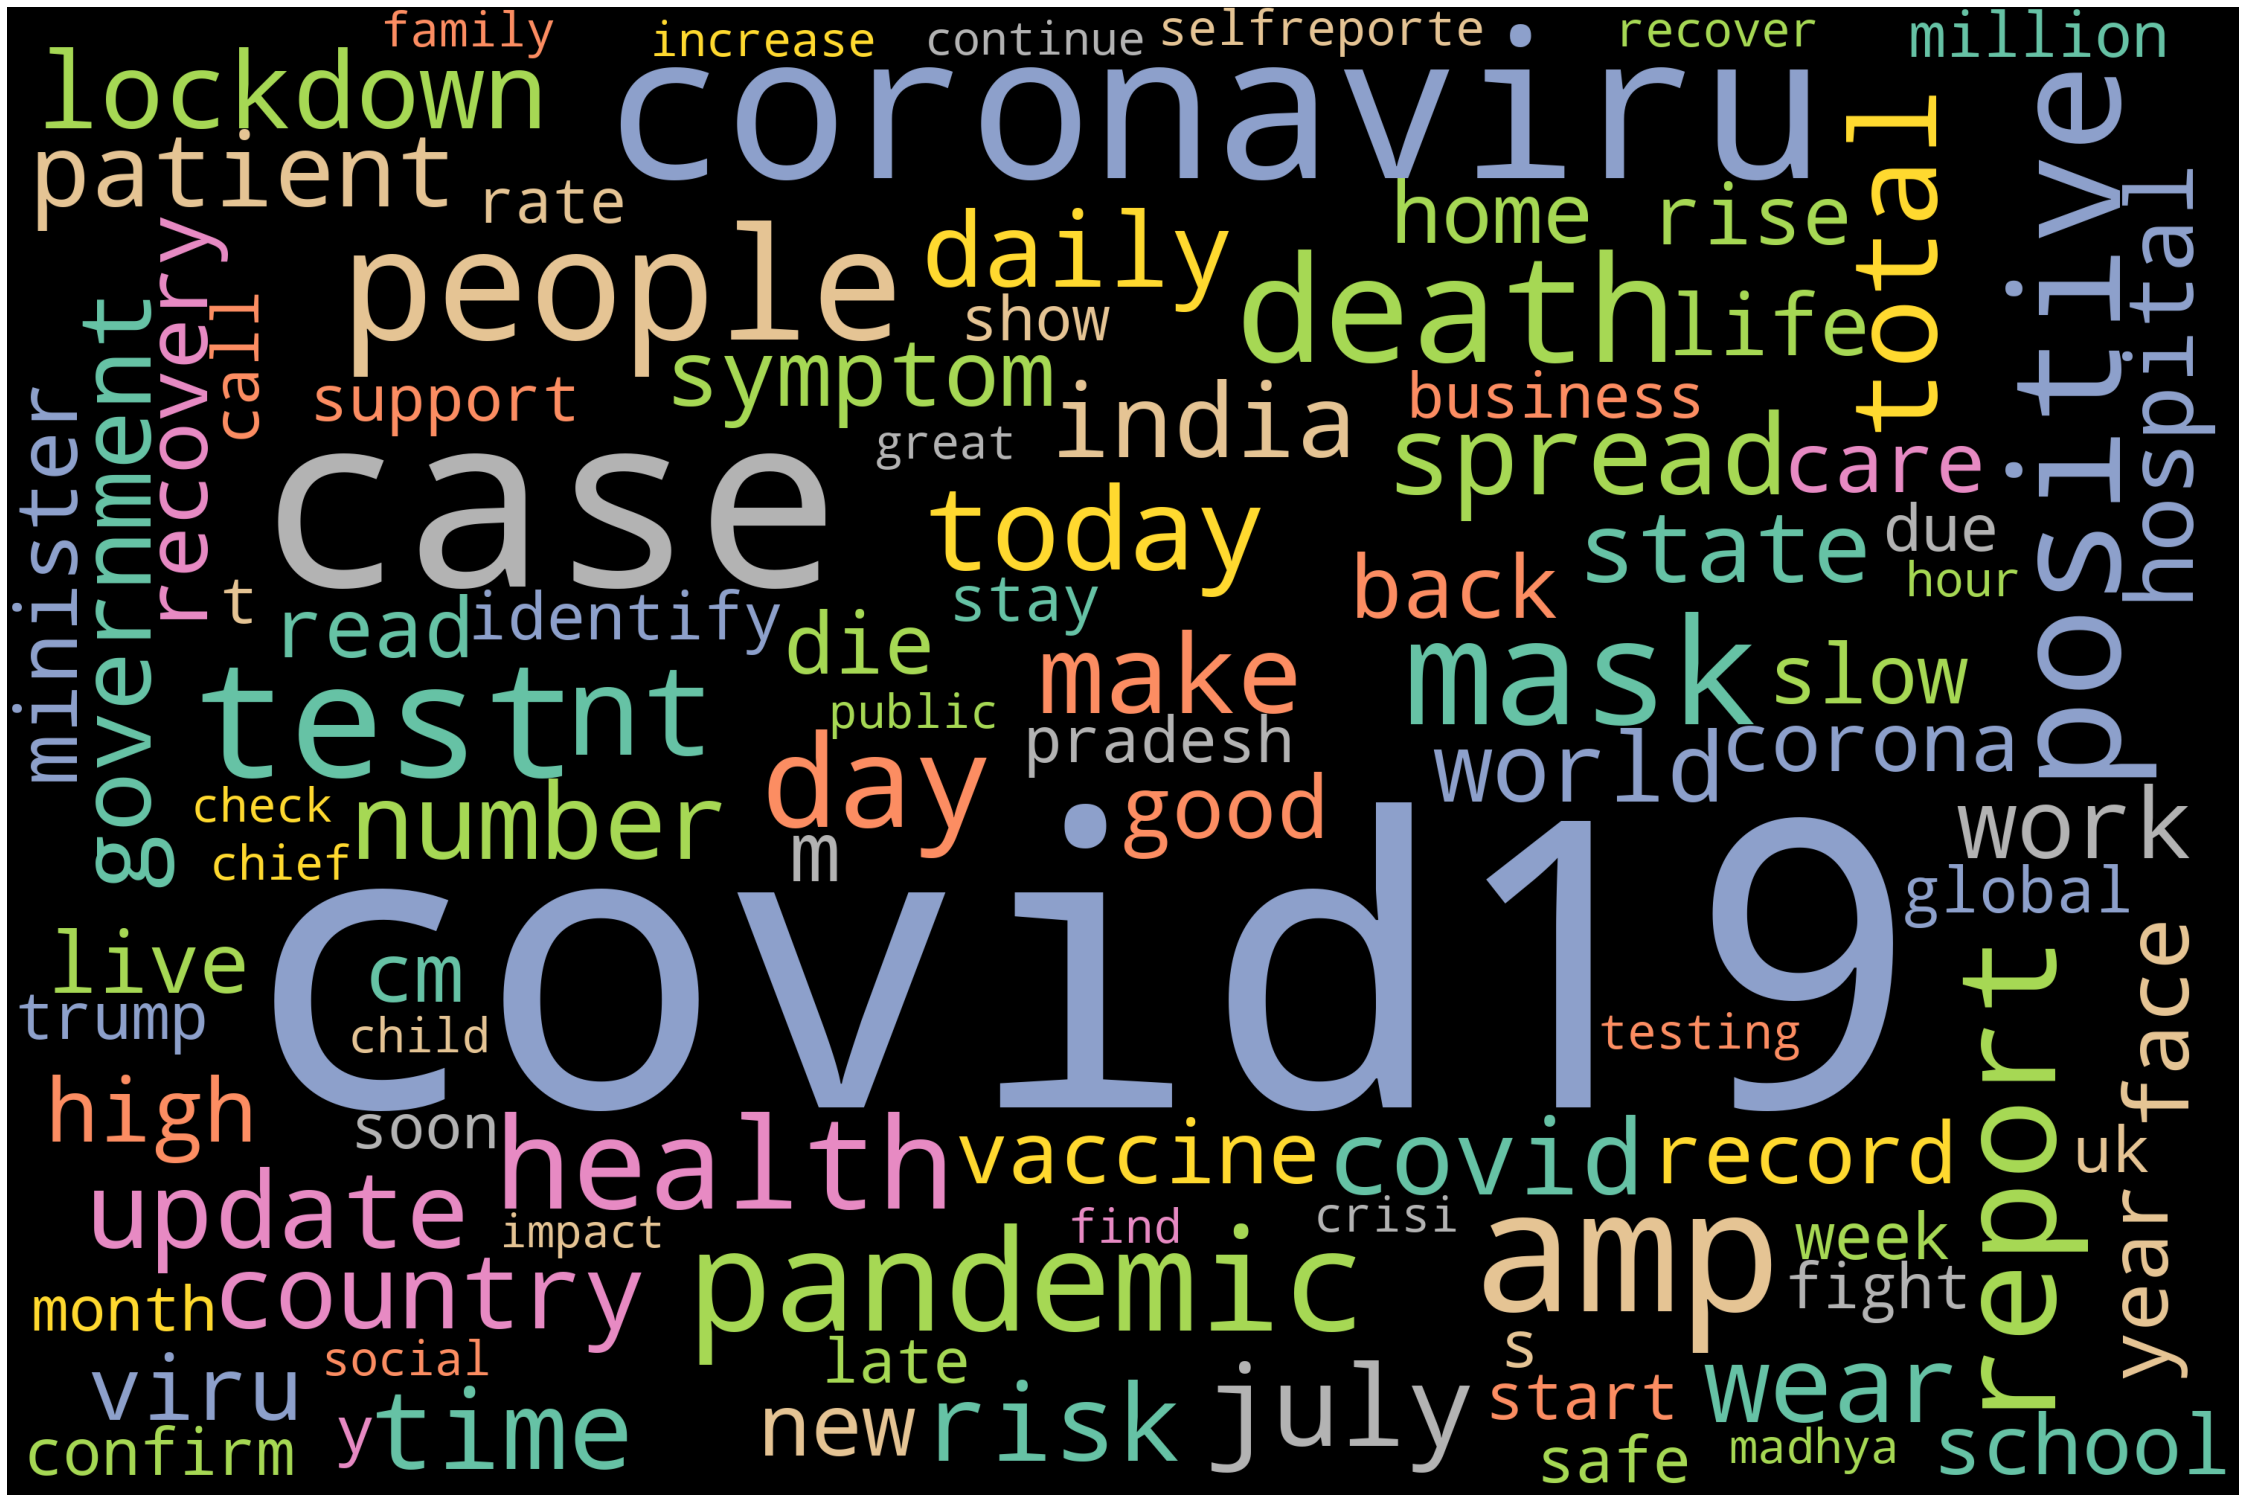

In [28]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords, collocations=False).generate(lemma_para)
# Plot
plot_cloud(wordcloud)

In [29]:
# importing positive words given by assignment team
with open("E:/DataSet/positive-words.txt", "r") as file:
  all_words = file.read()

pos_words = all_words.split("\n")
print(pos_words[0:50])

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;', '; ', '; Opinion Lexicon: Positive', ';', '; This file contains a list of POSITIVE opinion words (or sentiment words).', ';', '; This file and the papers can all be downloaded from ', ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html', ';', '; If you use this list, please cite one of the following two papers:', ';', ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ', ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ', ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ', ';       Washington, USA, ', ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ', ';       and Comparing Opinions on the Web." Proceedings of the 14th ', ';       International World Wide Web conference (WWW-2005), May 10-14, ', ';       2005, Chiba, Japan.', ';', '; Notes: ', ';    1. The appearance of an opinion word in a senten

In [30]:
# getting the index from where the actual list starts
for i in range(len(pos_words)):
  if i < 100:
    print(f"index: {i} --- {pos_words[i]}")

index: 0 --- ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
index: 1 --- ; 
index: 2 --- ; Opinion Lexicon: Positive
index: 3 --- ;
index: 4 --- ; This file contains a list of POSITIVE opinion words (or sentiment words).
index: 5 --- ;
index: 6 --- ; This file and the papers can all be downloaded from 
index: 7 --- ;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
index: 8 --- ;
index: 9 --- ; If you use this list, please cite one of the following two papers:
index: 10 --- ;
index: 11 --- ;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
index: 12 --- ;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
index: 13 --- ;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
index: 14 --- ;       Washington, USA, 
index: 15 --- ;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
index: 16 --- ;       and Comparing Opinions on the Web." Proceedings of the 14th 
in

In [31]:
pos_words = pos_words[35:]
print(pos_words[:100])

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'ag

In [32]:
with open("E:/DataSet/negative-words.txt", "r", encoding="ISO-8859-1") as file:
  all_words = file.read()

neg_words = all_words.split("\n")

for i in range(len(neg_words)):
  if i < 100:
    print(f"index: {i} --- {neg_words[i]}")

index: 0 --- ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
index: 1 --- ; 
index: 2 --- ; Opinion Lexicon: Negative
index: 3 --- ;
index: 4 --- ; This file contains a list of NEGATIVE opinion words (or sentiment words).
index: 5 --- ;
index: 6 --- ; This file and the papers can all be downloaded from 
index: 7 --- ;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
index: 8 --- ;
index: 9 --- ; If you use this list, please cite one of the following two papers:
index: 10 --- ;
index: 11 --- ;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
index: 12 --- ;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
index: 13 --- ;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
index: 14 --- ;       Washington, USA, 
index: 15 --- ;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
index: 16 --- ;       and Comparing Opinions on the Web." Proceedings of the 14th 


In [33]:
neg_words = neg_words[35:]
print(neg_words[:100])

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness', 'acrimonious', 'acrimoniously', 'acrimony', 'adamant', 'adamantly', 'addict', 'addicted', 'addicting', 'addicts', 'admonish', 'admonisher', 'admonishingly', 'admonishment', 'admonition', 'adulterate', 'adulterated', 'adulteration', 'adulterier', 'adversarial', 'adversary', 'adverse', 'adversity', 'afflict', 'affliction', 'afflictive', 'affront', 'afraid', 'aggravate', 'aggravating', 'aggravation', 'aggression', 'aggress

In [34]:
tweet_df = pd.DataFrame(tweets, columns=["Tweets"])
tweet_df

Tweets
0     If I smelled the scent of hand sanitizers toda...
1     Hey   and  - wouldn't it have made more sense ...
2        Trump never once claimed #COVID19 was a hoa...
3      The one gift #COVID19 has give me is an appre...
4     25 July : Media Bulletin on Novel #CoronaVirus...
...                                                 ...
9995  #ICYMI: New  coach Dave Rennie will have a few...
9996  So we are touching 1 L #COVID19 cases in just ...
9997  Which entity do I submit a word spelling chang...
9998  করোনায় চোখের যত্নে করনীয়\nFACEBOOK LINK: \n\...
9999  We're all patients now - isolation tantamount ...

[10000 rows x 1 columns]

In [35]:
lemmatizer = WordNetLemmatizer()
cleaned_text = []
for line in tweet_df.Tweets:
  x = line.split(" ")
  x = [x.lower() for x in x]
  x = [lemmatizer.lemmatize(x) for x in x]
  text = " ".join(x)
  no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
  x = no_punc_text.split(" ")
  x = [x.replace("\n","") for x in x]
  x = [x.replace("positive", "negative") for x in x]
  cleaned_text.append(x)

In [36]:
# logic for scoring the sentiment
index = 0
sentiment_score = {}
for line in cleaned_text:
  positivity = 0
  negativity = 0
  for word in line:
    if word in pos_words:
      positivity += 1
    if word in neg_words:
      negativity += 1
  if positivity > negativity:
    sentiment_score[index] =  "Positive"
  elif negativity > positivity:
    sentiment_score[index] =  "Negative"
  else:
    sentiment_score[index] =  "Neutral"
  index += 1

sentiment_score

{0: 'Negative',
 1: 'Positive',
 2: 'Neutral',
 3: 'Neutral',
 4: 'Neutral',
 5: 'Negative',
 6: 'Positive',
 7: 'Neutral',
 8: 'Positive',
 9: 'Neutral',
 10: 'Neutral',
 11: 'Neutral',
 12: 'Positive',
 13: 'Positive',
 14: 'Neutral',
 15: 'Neutral',
 16: 'Neutral',
 17: 'Neutral',
 18: 'Neutral',
 19: 'Negative',
 20: 'Positive',
 21: 'Neutral',
 22: 'Negative',
 23: 'Positive',
 24: 'Positive',
 25: 'Neutral',
 26: 'Neutral',
 27: 'Negative',
 28: 'Negative',
 29: 'Neutral',
 30: 'Negative',
 31: 'Negative',
 32: 'Negative',
 33: 'Negative',
 34: 'Positive',
 35: 'Neutral',
 36: 'Negative',
 37: 'Positive',
 38: 'Neutral',
 39: 'Neutral',
 40: 'Neutral',
 41: 'Neutral',
 42: 'Neutral',
 43: 'Negative',
 44: 'Neutral',
 45: 'Neutral',
 46: 'Neutral',
 47: 'Negative',
 48: 'Negative',
 49: 'Neutral',
 50: 'Negative',
 51: 'Negative',
 52: 'Negative',
 53: 'Positive',
 54: 'Negative',
 55: 'Negative',
 56: 'Negative',
 57: 'Negative',
 58: 'Negative',
 59: 'Negative',
 60: 'Positive',

In [37]:
cleaned_lines_list = []
for line in cleaned_text:
  line = [x.replace("negative", "positive") for x in line]
  line = " ".join(line)
  cleaned_lines_list.append(line)
print(cleaned_lines_list)

['if i smelled the scent of hand sanitizers today on someone in the past i would think they were so intoxicated that… ', 'hey   and   wouldnt it have made more sense to have the player pay their respect to the a… ', '   trump never once claimed covid19 wa a hoax we all claim that this effort to… ', ' the one gift covid19 ha give me is an appreciation for the simple thing that were always around me… ', '25 july  medium bulletin on novel coronavirusupdates covid19     ', 'coronavirus covid19 death continue to rise its almost  a bad a it ever was  politician and business want… ', 'how covid19 will change work in general and recruiting specifically via  recruiting… ', 'you now have to wear face covering when out shopping  this includes a visit to your local community pharmacy… ', 'praying for good health and recovery of  covid19covidpositive', 'pope a god  prophet sadhu sundar selvaraj watch here at  hurricanehanna covid19… ', '49k covid19 case still no response from    cancel the compartm

In [38]:
new_dict = dict(zip(cleaned_lines_list, list(sentiment_score.values())))
new_dict

{'if i smelled the scent of hand sanitizers today on someone in the past i would think they were so intoxicated that… ': 'Negative',
 'hey   and   wouldnt it have made more sense to have the player pay their respect to the a… ': 'Positive',
 '   trump never once claimed covid19 wa a hoax we all claim that this effort to… ': 'Neutral',
 ' the one gift covid19 ha give me is an appreciation for the simple thing that were always around me… ': 'Neutral',
 '25 july  medium bulletin on novel coronavirusupdates covid19     ': 'Neutral',
 'coronavirus covid19 death continue to rise its almost  a bad a it ever was  politician and business want… ': 'Negative',
 'how covid19 will change work in general and recruiting specifically via  recruiting… ': 'Positive',
 'you now have to wear face covering when out shopping  this includes a visit to your local community pharmacy… ': 'Neutral',
 'praying for good health and recovery of  covid19covidpositive': 'Positive',
 'pope a god  prophet sadhu sundar s

In [39]:
df = pd.DataFrame()
df["Tweets"] = list(new_dict.keys())
df["Sentiment"] = list(new_dict.values())
df

Tweets Sentiment
0     if i smelled the scent of hand sanitizers toda...  Negative
1     hey   and   wouldnt it have made more sense to...  Positive
2        trump never once claimed covid19 wa a hoax ...   Neutral
3      the one gift covid19 ha give me is an appreci...   Neutral
4     25 july  medium bulletin on novel coronavirusu...   Neutral
...                                                 ...       ...
9312  icymi new  coach dave rennie will have a few t...  Positive
9313  so we are touching 1 l covid19 case in just tw...   Neutral
9314  which entity do i submit a word spelling chang...   Neutral
9315  করোনায় চোখের যত্নে করনীয়facebook link youtub...   Neutral
9316  were all patient now  isolation tantamount to ...   Neutral

[9317 rows x 2 columns]

(array([2690.,    0.,    0.,    0.,    0., 2340.,    0.,    0.,    0.,
        4287.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

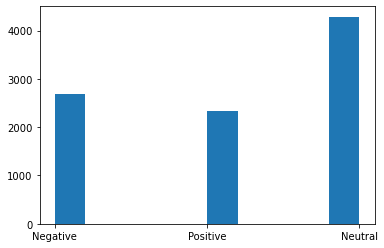

In [40]:
plt.hist(df["Sentiment"])

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

In [42]:
vader_scores = []
for index in range(len(df["Tweets"])):
  score = sid.polarity_scores(df["Tweets"][index])
  if score["pos"] > score["neg"]:
    vader_scores.append("Positive")
  elif score["pos"] < score["neg"]:
    vader_scores.append("Negative")
  else:
    vader_scores.append("Neutral")

df["Sentiment_VADER"] = vader_scores
df    

Tweets Sentiment  \
0     if i smelled the scent of hand sanitizers toda...  Negative   
1     hey   and   wouldnt it have made more sense to...  Positive   
2        trump never once claimed covid19 wa a hoax ...   Neutral   
3      the one gift covid19 ha give me is an appreci...   Neutral   
4     25 july  medium bulletin on novel coronavirusu...   Neutral   
...                                                 ...       ...   
9312  icymi new  coach dave rennie will have a few t...  Positive   
9313  so we are touching 1 l covid19 case in just tw...   Neutral   
9314  which entity do i submit a word spelling chang...   Neutral   
9315  করোনায় চোখের যত্নে করনীয়facebook link youtub...   Neutral   
9316  were all patient now  isolation tantamount to ...   Neutral   

     Sentiment_VADER  
0           Positive  
1           Positive  
2           Negative  
3           Positive  
4           Positive  
...              ...  
9312        Negative  
9313         Neutral  
9314         Neutral  
9315         Neutral  
9316        Negative  

[9317 rows x 3 columns]

(array([4020.,    0.,    0.,    0.,    0., 2431.,    0.,    0.,    0.,
        2866.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

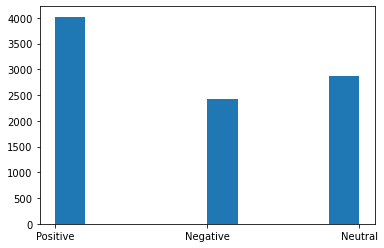

In [43]:
plt.hist(df["Sentiment_VADER"])